<a href="https://colab.research.google.com/github/vilmarprado/mack_ling_prog_cie_dados/blob/main/LP_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<br>
<br>

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# Exercício T4

<br>
<br>

---


# Analise dados do mercado de trabalho



<img src="https://www.glassdoor.com/about-us//app/uploads/sites/2/2018/06/Group-7.png" width=300>  



Aqui você vai empregar uma base de dados da [glassdoor](https://www.glassdoor.com/about/) com informações reais do mercado de trabalho de 1000 funcionários de uma empresa. Empregue esses dados, e o que você aprendeu sobre `Python` e as  bibliotecas `Pandas`, `Matplotlib` e `Seaborn`, para implementar uma análise de dados trazendo *insights* sobre esses para a empresa.

Por **exemplo**, se o nosso dataset fosse sobre despesas em um grande restaurante como abaixo.

In [ ]:
#@markdown
import seaborn as sns

xyz = sns.load_dataset('tips')
xyz.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Você poderia buscar *insights* sobre se o restaurante tem uma receita maior com clientes fumantes, ou ainda se mesas com fumantes são em média mesas com maior número de lugares, para tomar decisões quanto a onde construir uma nova área reservada para fumantes. Você poderia também fazer um gráfico de para verificar a distribuição do tamanho de mesas ao longo dos dias da semana para tomar uma decisão sobre a organização do espaço do restaurante. Essas análises você pode facilmente construir a partir de seleções e visualizações dos dados em `Python`.

Empregue a base `glassdoor` a seguir e **implemente**:

1. **Ao menos duas seleções de dados; e**

2. **Uma visualização (um gráfico)**

que tragam *insights* valiosos e relevantes para a empresa. **Para cada uma faça um pequeno parágrafo, 4-5 linhas, compartilhando sua análise e conclusões**.

In [2]:
import pandas as pd

data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## Referências úteis para este Lab

Você pode acessar soluções na internet, mas tenha certeza de que os códigos que encontrar façam sentido para você.

Você também pode achar útil e fácil consultar, além das notas de aula as seguintes referências:

* [Basic Python Tutorial](https://www.w3schools.com/python/)
* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


# Seu Código aqui.

Mostra as Cinco maiores rendas

In [3]:
# Seu código
data.nlargest(5,'income')


,jobtitle,gender,age,performance,education,department,seniority,income,bonus
927,Manager,Male,58,1,PhD,Management,4,179726,4284
353,Manager,Male,59,4,PhD,Sales,5,176789,6773
609,IT,Male,65,4,Masters,Sales,5,165229,6506
799,Manager,Male,55,1,High School,Management,5,163208,4095
357,Manager,Female,60,4,PhD,Management,3,160614,8354


Mostra as cinco menores renda

In [4]:
data.nsmallest(5,'income')

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
465,Marketing Associate,Female,18,3,High School,Engineering,2,34208,6620
348,Marketing Associate,Female,22,4,PhD,Operations,1,36548,8090
824,Marketing Associate,Female,26,1,High School,Management,1,36585,4373
949,Graphic Designer,Male,30,1,College,Operations,2,36642,4388
590,Marketing Associate,Female,41,3,High School,Administration,2,36972,7058


Mostra a renda média entre homens e mulheres

In [5]:
sal_medio_mulheres = data[data.gender=='Female']['income'].mean()
sal_medio_homens = data[data.gender=='Male']['income'].mean()

print('Sal Med Mulheres', sal_medio_mulheres, 'Sal Med Homens', sal_medio_homens)

Sal Med Mulheres 89942.81837606838 Sal Med Homens 98457.54511278195


Agrupa por sexo, grau de educação e conta numero de pessoas

In [6]:
data_agrup = data.groupby(['gender','education'], as_index=False).jobtitle.count()
data_agrup.columns = ['gender','education','count']
data_agrup

,gender,education,count
0,Female,College,123
1,Female,High School,132
2,Female,Masters,107
3,Female,PhD,106
4,Male,College,118
5,Male,High School,133
6,Male,Masters,149
7,Male,PhD,132


In [7]:
df = data.groupby(['gender','education'], as_index=False).jobtitle.count()
df.columns = ['gender','education','count']
df_pivot_x = pd.pivot_table(df, index='gender', columns='education', values='count').reset_index()

df_pivot = df_pivot_x.set_index('gender')
df_pivot

education,College,High School,Masters,PhD
gender,,,,
Female,123,132,107,106
Male,118,133,149,132


<Axes: xlabel='gender'>

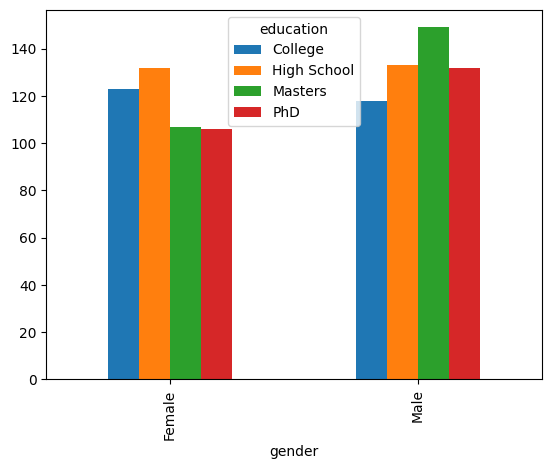

In [12]:
df_pivot.plot(kind='bar')

Agrupamento troca as linhas pelas colunas

In [9]:
data_agrup_pivot_x = pd.pivot_table(data_agrup,index = 'education', columns ='gender', values='count').reset_index()
#data_agrup_pivot_x
data_agrup_pivot = data_agrup_pivot_x.set_index('education')
data_agrup_pivot

gender,Female,Male
education,,
College,123,118
High School,132,133
Masters,107,149
PhD,106,132


<Axes: xlabel='education'>

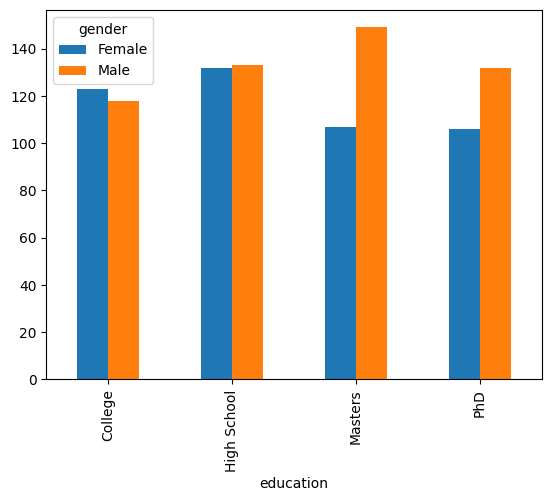

In [13]:
data_agrup_pivot.plot(kind='bar')

<Axes: xlabel='education'>

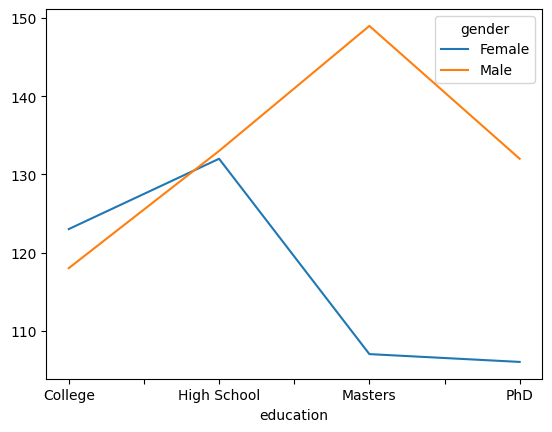

In [14]:
data_agrup_pivot.plot()

In [18]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df2 = data.groupby(['gender','jobtitle'], as_index=False).income.mean()
df2

,gender,jobtitle,income
0,Female,Data Scientist,95704.792453
1,Female,Driver,86867.630435
2,Female,Financial Analyst,95458.326531
3,Female,Graphic Designer,92243.291667
4,Female,IT,90475.720000
5,Female,Manager,127252.277778
6,Female,Marketing Associate,76119.177570
7,Female,Sales Associate,91894.209302
8,Female,Software Engineer,94701.000000
9,Female,Warehouse Associate,92428.260870


In [22]:
df2_pivot_x = pd.pivot_table(df2,index = 'jobtitle', columns ='gender', values='income').reset_index()
df2_pivot = df2_pivot_x.set_index('jobtitle')
df2_pivot

gender,Female,Male
jobtitle,,
Data Scientist,95704.792453,89222.629630
Driver,86867.630435,91952.666667
Financial Analyst,95458.326531,94607.034483
Graphic Designer,92243.291667,89595.800000
IT,90475.720000,91021.978261
Manager,127252.277778,124848.930556
Marketing Associate,76119.177570,81881.818182
Sales Associate,91894.209302,94663.117647
Software Engineer,94701.000000,106371.485149


<Axes: xlabel='jobtitle'>

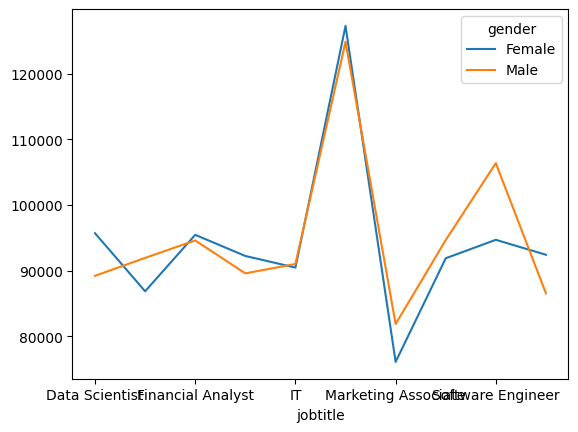

In [23]:
df2_pivot.plot()

<Axes: xlabel='jobtitle'>

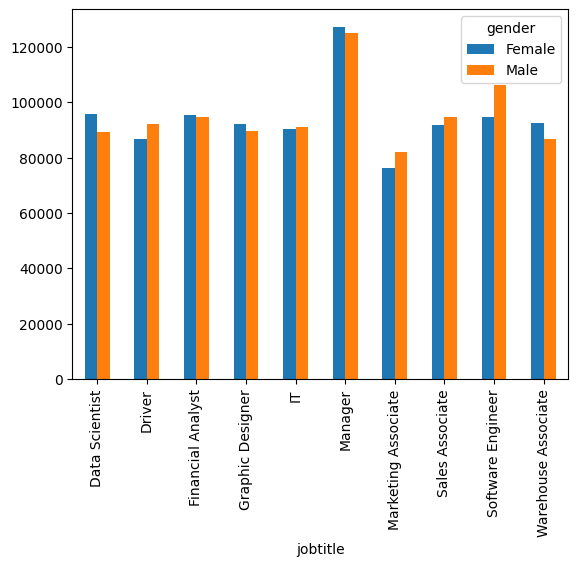

In [24]:
df2_pivot.plot(kind = 'bar')

<Axes: xlabel='jobtitle'>

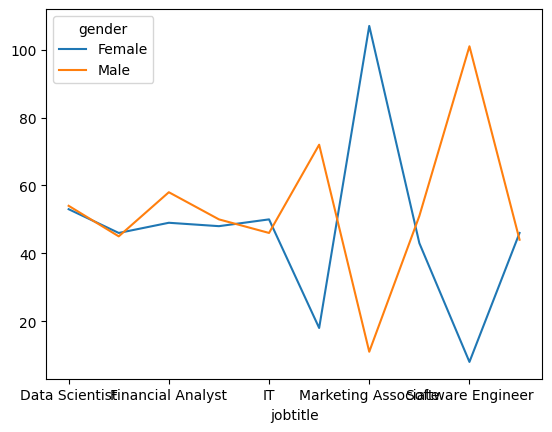

In [15]:
from sqlalchemy import column
df1 = data.groupby(['gender','jobtitle'], as_index=False).education.count()
df1.columns = ['gender','jobtitle','count']
#data_agrup = data.groupby(['gender','education'], as_index=False).jobtitle.count()
df1
df1_p = pd.pivot_table(df1,index = 'jobtitle', columns ='gender', values='count').reset_index()
#       pd.pivot_table(data_agrup,index = 'education', columns ='gender', values='count').reset_index()
#a = plt.axes()
df1_p
df1_s = df1_p.set_index('jobtitle')
df1_s.plot()


<Axes: xlabel='jobtitle'>

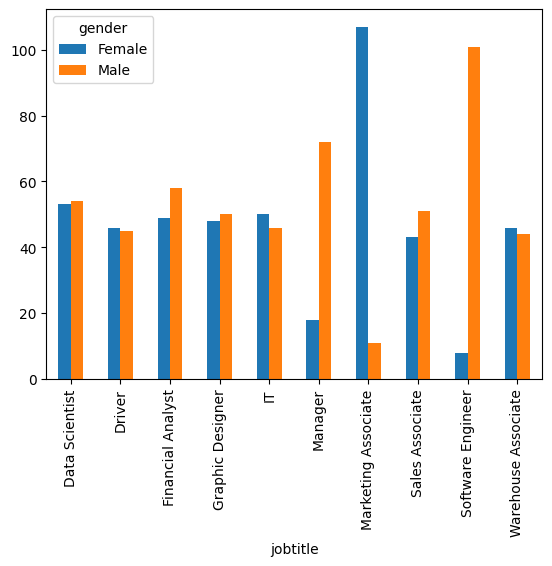

In [17]:
df1_s.plot(kind = 'bar')